# Constants

In [1]:
NUMBER_OF_PROCESSORS = 20 # Default: 20
CLUSTERS_WIDTH = 2 # Default: 2.0
WATER_REFERENCE_IDS = [['W', 2, ' OW '], ['W', 3, ' OW ']]
WATER_SIMULATION_IDS = [['W', 1, ' OW '], ['W', 2, ' OW '], ['W', 3, ' OW ']] # Default: [['W', 1, ' OW '], ['W', 2, ' OW '], ['W', 3, ' OW ']]
FIRST_ATOMS_TO_IGNORE = 1 # Default: 1

# Imports

In [2]:
import os
from sklearn import cluster
import matplotlib.pyplot as plt
from matplotlib import patches

from scripts import obtain_water_data_from, get_reference_coords
from scripts import get_density, get_matchs, fulfill_condition
from scripts import add_metrics_to_reports, write_centroids, get_metric
from scripts import get_ordered_matchs, add_matchs_to_reports

# Alpha-arabinose (AAR)

In [3]:
SIMULATION_PATH = '/home/municoy/LocalResults/waters/1ABE/with_spc/'
try:
    # Create target Directory
    os.mkdir(SIMULATION_PATH + 'Plots')
except FileExistsError:
    pass

## Read Simulation data and extract water info

In [4]:
(atom_reports, atom_ids, atom_models, atom_coords), list_of_reports = \
    obtain_water_data_from(SIMULATION_PATH + 'AAR_local_adaptive.conf',
                           NUMBER_OF_PROCESSORS,
                           WATER_SIMULATION_IDS,
                           FIRST_ATOMS_TO_IGNORE)

- Parsing control file...
  - A total of 1 epochs and 127 reports were found.
- Listing reports...
- Retrieving data...
- Linking report pointers...
- Parsing data...


## Retrieve reference data

In [5]:
ref_coords = get_reference_coords('1ABE_AAR.pdb', SIMULATION_PATH + 'PDB', WATER_REFERENCE_IDS)

## Clustering

In [6]:
estimator = cluster.MeanShift(bandwidth=CLUSTERS_WIDTH, n_jobs=NUMBER_OF_PROCESSORS, cluster_all=True)
results = estimator.fit_predict(atom_coords)

In [7]:
reference_clusters = []
for ref_coord in ref_coords:
    reference_clusters += estimator.predict([ref_coord]).tolist()

## Clustering analysis

In [8]:
densities = get_density(atom_ids, results, WATER_SIMULATION_IDS)

In [9]:
# matchs_dict is dict will have atom_report + atom_model as key and number of matchs as value
matchs_dict = get_matchs(results, atom_reports, atom_models, FIRST_ATOMS_TO_IGNORE)

In [10]:
add_metrics_to_reports(matchs_dict, FIRST_ATOMS_TO_IGNORE, reference_clusters)

## Display results

In [11]:
print('Ref', 'Cluster n.', 'Probability')
for cluster_n, cluster_density in densities.items():
    if cluster_density < 0.01:
        continue
    if (cluster_n in reference_clusters):
        print(' *    ', end='')
    else:
        print('      ', end='')
    print('{:3d}        {:5.3f}'.format(int(cluster_n), float(cluster_density)))

Ref Cluster n. Probability
 *      0        0.470
        1        0.199
        2        0.085
        3        0.078
        4        0.055
        5        0.045
        6        0.036
        7        0.023


In [12]:
write_centroids(estimator, densities,
                '/home/municoy/LocalResults/waters/1ABE/with_spc/PDB/AAR_centroids.pdb',
                normalize=True)

In [13]:
energies = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Binding Energy')
currentEnergy = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='currentEnergy')
distances = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Lig-Arg149_distance')
matchs = get_ordered_matchs(list_of_reports, matchs_dict, reference_clusters)
add_matchs_to_reports(list_of_reports, matchs)
norm = plt.Normalize(0, len(WATER_REFERENCE_IDS))
cmap = plt.cm.RdYlGn
patches_list = [patches.Patch(color=cmap(norm(0)), label='No matches'), ]
for i in range(len(WATER_REFERENCE_IDS)):
    if i == 0:
        match_str = "match"
    else:
        match_str = "matches"
    patches_list.append(patches.Patch(color=cmap(norm(i + 1)), label='{} {}'.format(i + 1, match_str)))

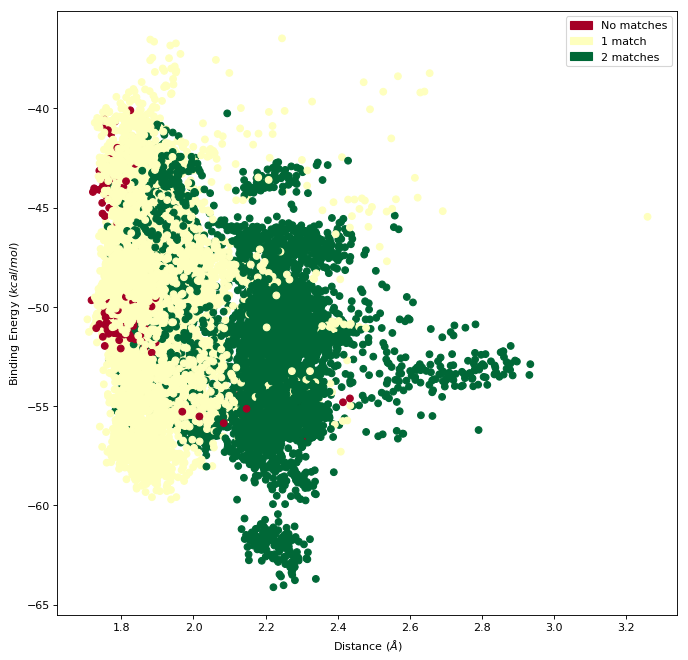

In [14]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, energies, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
plt.savefig(SIMULATION_PATH + 'Plots/AAR_BE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

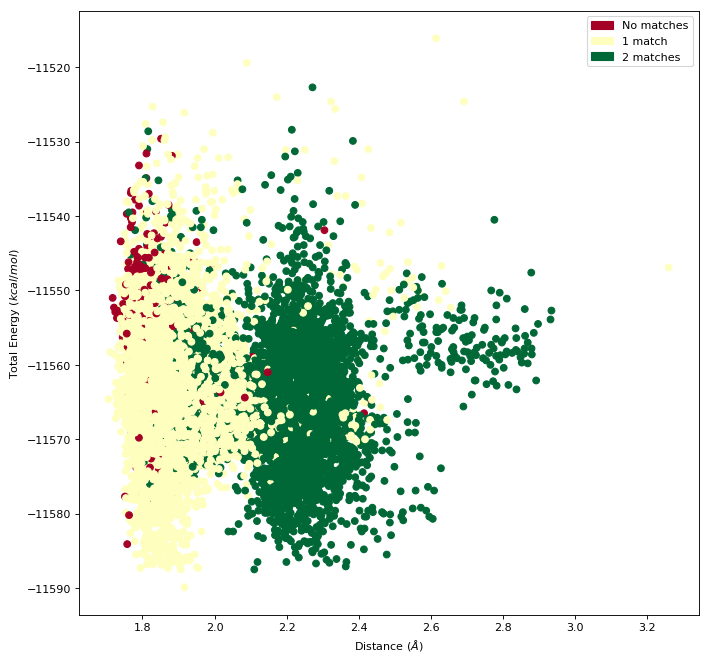

In [15]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Total Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, currentEnergy, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
plt.savefig(SIMULATION_PATH + 'Plots/AAR_TE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

In [16]:
#ax = sns.scatterplot(log_densities, list(energy1.values()))
#plt.show()

In [17]:
#ax = sns.scatterplot(log_densities, list(energy2.values()))
#plt.show()

In [18]:
#ax = sns.scatterplot(log_densities, list(energy3.values()))
#plt.show()

# Alpha-galactose (AGA)

In [19]:
SIMULATION_PATH = '/home/municoy/LocalResults/waters/1ABE/with_spc/'
try:
    # Create target Directory
    os.mkdir(SIMULATION_PATH + 'Plots')
except FileExistsError:
    pass

## Read Simulation data and extract water info

In [20]:
(atom_reports, atom_ids, atom_models, atom_coords), list_of_reports = \
    obtain_water_data_from(SIMULATION_PATH + 'AGA_local_adaptive.conf',
                           NUMBER_OF_PROCESSORS,
                           WATER_SIMULATION_IDS,
                           FIRST_ATOMS_TO_IGNORE)

- Parsing control file...
  - A total of 1 epochs and 127 reports were found.
- Listing reports...
- Retrieving data...
- Linking report pointers...
- Parsing data...


## Retrieve reference data

In [21]:
ref_coords = get_reference_coords('1ABE_AAR.pdb', SIMULATION_PATH + 'PDB', WATER_REFERENCE_IDS)

In [22]:
reference_clusters = []
for ref_coord in ref_coords:
    reference_clusters += estimator.predict([ref_coord]).tolist()

## Clustering

In [23]:
estimator = cluster.MeanShift(bandwidth=CLUSTERS_WIDTH, n_jobs=NUMBER_OF_PROCESSORS, cluster_all=True)
results = estimator.fit_predict(atom_coords)

## Clustering analysis

In [24]:
densities = get_density(atom_ids, results, WATER_SIMULATION_IDS)

In [25]:
# matchs_dict is dict will have atom_report + atom_model as key and number of matchs as value
matchs_dict = get_matchs(results, atom_reports, atom_models, FIRST_ATOMS_TO_IGNORE)

In [26]:
add_metrics_to_reports(matchs_dict, FIRST_ATOMS_TO_IGNORE, reference_clusters)

## Display results

In [27]:
print('Ref', 'Cluster n.', 'Probability')
for cluster_n, cluster_density in densities.items():
    if cluster_density < 0.01:
        continue
    if (cluster_n in reference_clusters):
        print(' *    ', end='')
    else:
        print('      ', end='')
    print('{:3d}        {:5.3f}'.format(int(cluster_n), float(cluster_density)))

Ref Cluster n. Probability
 *      0        0.360
        1        0.261
        2        0.105
        3        0.077
        4        0.065
        5        0.025
        6        0.021
        7        0.021
        8        0.041


In [28]:
write_centroids(estimator, densities,
                '/home/municoy/LocalResults/waters/1ABE/with_spc/PDB/AGA_centroids.pdb',
                normalize=True)

In [29]:
energies = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Binding Energy')
currentEnergy = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='currentEnergy')
distances = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Lig-Arg149_distance')
matchs = get_ordered_matchs(list_of_reports, matchs_dict, reference_clusters)
add_matchs_to_reports(list_of_reports, matchs)
norm = plt.Normalize(0, len(WATER_REFERENCE_IDS))
cmap = plt.cm.RdYlGn
patches_list = [patches.Patch(color=cmap(norm(0)), label='No matches'), ]
for i in range(len(WATER_REFERENCE_IDS)):
    if i == 0:
        match_str = "match"
    else:
        match_str = "matches"
    patches_list.append(patches.Patch(color=cmap(norm(i + 1)), label='{} {}'.format(i + 1, match_str)))

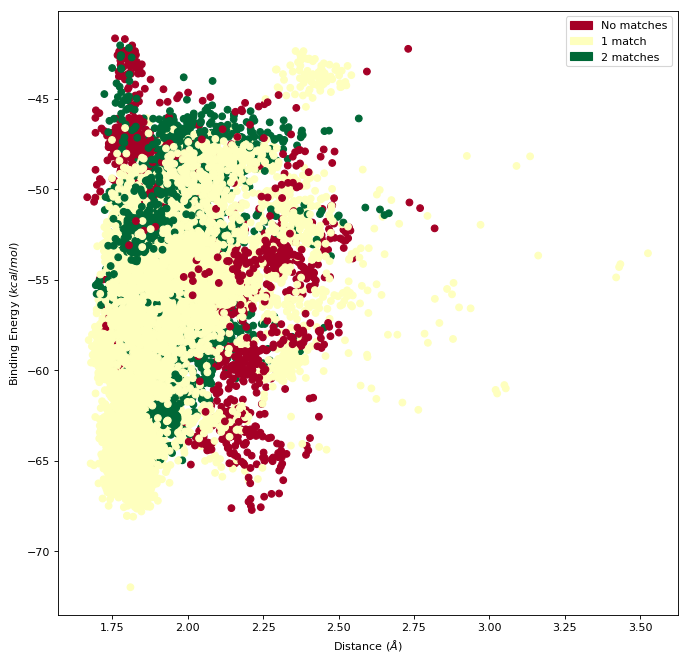

In [30]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, energies, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
plt.savefig(SIMULATION_PATH + 'Plots/AGA_BE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

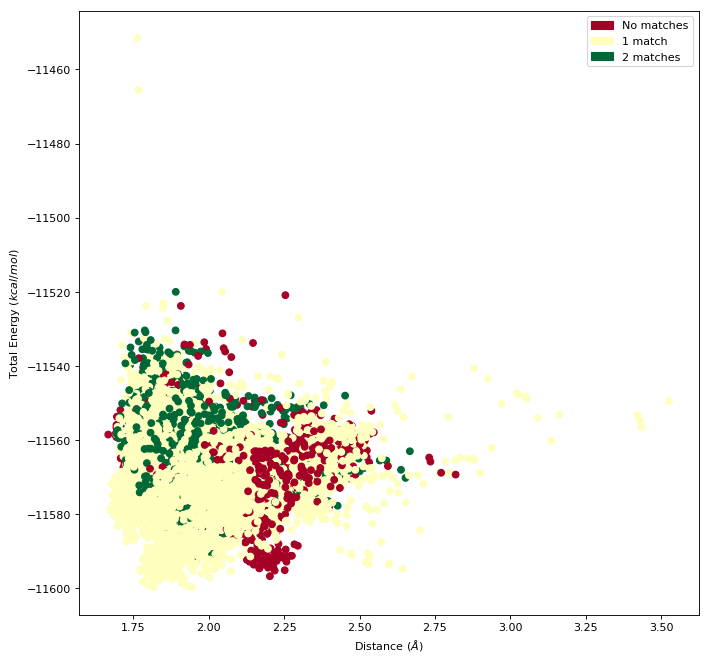

In [31]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Total Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, currentEnergy, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
plt.savefig(SIMULATION_PATH + 'Plots/AGA_TE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

# Beta-arabinose (BAR)

In [32]:
SIMULATION_PATH = '/home/municoy/LocalResults/waters/1ABE/with_spc/'
try:
    # Create target Directory
    os.mkdir(SIMULATION_PATH + 'Plots')
except FileExistsError:
    pass

## Read Simulation data and extract water info

In [33]:
(atom_reports, atom_ids, atom_models, atom_coords), list_of_reports = \
    obtain_water_data_from(SIMULATION_PATH + 'BAR_local_adaptive.conf',
                           NUMBER_OF_PROCESSORS,
                           WATER_SIMULATION_IDS,
                           FIRST_ATOMS_TO_IGNORE)

- Parsing control file...
  - A total of 1 epochs and 127 reports were found.
- Listing reports...
- Retrieving data...
- Linking report pointers...
- Parsing data...


## Retrieve reference data

In [34]:
ref_coords = get_reference_coords('1ABE_AAR.pdb', SIMULATION_PATH + 'PDB', WATER_REFERENCE_IDS)

In [35]:
reference_clusters = []
for ref_coord in ref_coords:
    reference_clusters += estimator.predict([ref_coord]).tolist()

## Clustering

In [36]:
estimator = cluster.MeanShift(bandwidth=CLUSTERS_WIDTH, n_jobs=NUMBER_OF_PROCESSORS, cluster_all=True)
results = estimator.fit_predict(atom_coords)

## Clustering analysis

In [37]:
densities = get_density(atom_ids, results, WATER_SIMULATION_IDS)

In [38]:
# matchs_dict is dict will have atom_report + atom_model as key and number of matchs as value
matchs_dict = get_matchs(results, atom_reports, atom_models, FIRST_ATOMS_TO_IGNORE)

In [39]:
add_metrics_to_reports(matchs_dict, FIRST_ATOMS_TO_IGNORE, reference_clusters)

## Display results

In [40]:
print('Ref', 'Cluster n.', 'Probability')
for cluster_n, cluster_density in densities.items():
    if cluster_density < 0.01:
        continue
    if (cluster_n in reference_clusters):
        print(' *    ', end='')
    else:
        print('      ', end='')
    print('{:3d}        {:5.3f}'.format(int(cluster_n), float(cluster_density)))

Ref Cluster n. Probability
 *      0        0.449
        1        0.185
        2        0.113
        3        0.074
        4        0.065
        5        0.036
        6        0.034
        7        0.015
        8        0.011


In [41]:
write_centroids(estimator, densities,
                '/home/municoy/LocalResults/waters/1ABE/with_spc/PDB/AGA_centroids.pdb',
                normalize=True)

In [42]:
energies = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Binding Energy')
currentEnergy = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='currentEnergy')
distances = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Lig-Arg149_distance')
matchs = get_ordered_matchs(list_of_reports, matchs_dict, reference_clusters)
add_matchs_to_reports(list_of_reports, matchs)
norm = plt.Normalize(0, len(WATER_REFERENCE_IDS))
cmap = plt.cm.RdYlGn
patches_list = [patches.Patch(color=cmap(norm(0)), label='No matches'), ]
for i in range(len(WATER_REFERENCE_IDS)):
    if i == 0:
        match_str = "match"
    else:
        match_str = "matches"
    patches_list.append(patches.Patch(color=cmap(norm(i + 1)), label='{} {}'.format(i + 1, match_str)))

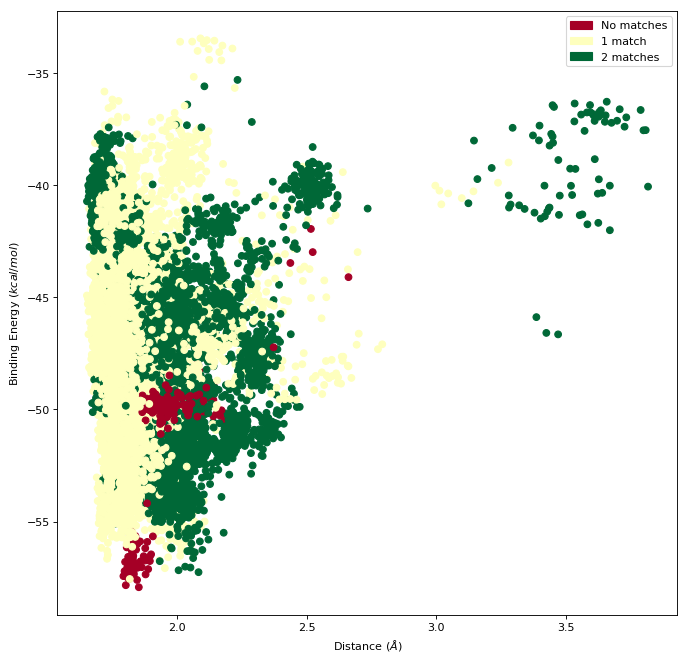

In [43]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, energies, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
plt.savefig(SIMULATION_PATH + 'Plots/BAR_BE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

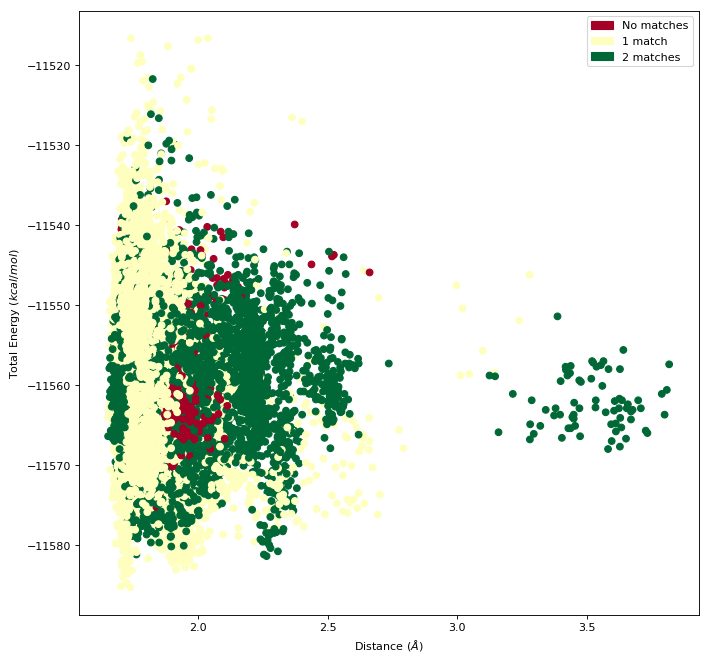

In [44]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Total Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, currentEnergy, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
plt.savefig(SIMULATION_PATH + 'Plots/BAR_TE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

# Beta-galactose (BGA)

In [45]:
SIMULATION_PATH = '/home/municoy/LocalResults/waters/1ABE/with_spc/'
try:
    # Create target Directory
    os.mkdir(SIMULATION_PATH + 'Plots')
except FileExistsError:
    pass

## Read Simulation data and extract water info

In [46]:
(atom_reports, atom_ids, atom_models, atom_coords), list_of_reports = \
    obtain_water_data_from(SIMULATION_PATH + 'BGA_local_adaptive.conf',
                           NUMBER_OF_PROCESSORS,
                           WATER_SIMULATION_IDS,
                           FIRST_ATOMS_TO_IGNORE)

- Parsing control file...
  - A total of 1 epochs and 127 reports were found.
- Listing reports...
- Retrieving data...
- Linking report pointers...
- Parsing data...


## Retrieve reference data

In [47]:
ref_coords = get_reference_coords('1ABE_AAR.pdb', SIMULATION_PATH + 'PDB', WATER_REFERENCE_IDS)

In [48]:
reference_clusters = []
for ref_coord in ref_coords:
    reference_clusters += estimator.predict([ref_coord]).tolist()

## Clustering

In [49]:
estimator = cluster.MeanShift(bandwidth=CLUSTERS_WIDTH, n_jobs=NUMBER_OF_PROCESSORS, cluster_all=True)
results = estimator.fit_predict(atom_coords)

## Clustering analysis

In [50]:
densities = get_density(atom_ids, results, WATER_SIMULATION_IDS)

In [51]:
# matchs_dict is dict will have atom_report + atom_model as key and number of matchs as value
matchs_dict = get_matchs(results, atom_reports, atom_models, FIRST_ATOMS_TO_IGNORE)

In [52]:
add_metrics_to_reports(matchs_dict, FIRST_ATOMS_TO_IGNORE, reference_clusters)

## Display results

In [53]:
print('Ref', 'Cluster n.', 'Probability')
for cluster_n, cluster_density in densities.items():
    if cluster_density < 0.01:
        continue
    if (cluster_n in reference_clusters):
        print(' *    ', end='')
    else:
        print('      ', end='')
    print('{:3d}        {:5.3f}'.format(int(cluster_n), float(cluster_density)))

Ref Cluster n. Probability
 *      0        0.376
        1        0.203
        2        0.111
        3        0.078
        4        0.082
        5        0.033
        6        0.034
        7        0.017
        8        0.036
       13        0.011


In [54]:
write_centroids(estimator, densities,
                '/home/municoy/LocalResults/waters/1ABE/with_spc/PDB/BGA_centroids.pdb',
                normalize=True)

In [55]:
energies = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Binding Energy')
currentEnergy = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='currentEnergy')
distances = get_metric(list_of_reports, FIRST_ATOMS_TO_IGNORE, metric_name='Lig-Arg149_distance')
matchs = get_ordered_matchs(list_of_reports, matchs_dict, reference_clusters)
add_matchs_to_reports(list_of_reports, matchs)
norm = plt.Normalize(0, len(WATER_REFERENCE_IDS))
cmap = plt.cm.RdYlGn
patches_list = [patches.Patch(color=cmap(norm(0)), label='No matches'), ]
for i in range(len(WATER_REFERENCE_IDS)):
    if i == 0:
        match_str = "match"
    else:
        match_str = "matches"
    patches_list.append(patches.Patch(color=cmap(norm(i + 1)), label='{} {}'.format(i + 1, match_str)))

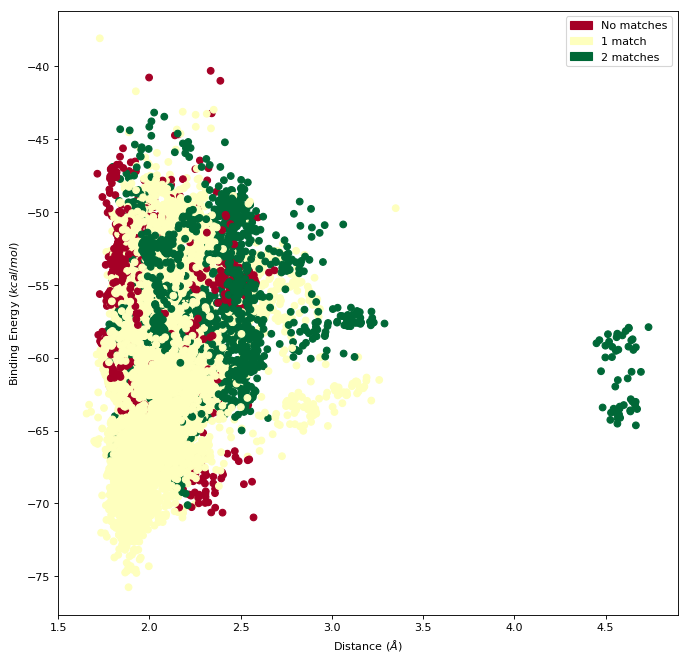

In [56]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Binding Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, energies, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
plt.savefig(SIMULATION_PATH + 'Plots/BGA_BE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

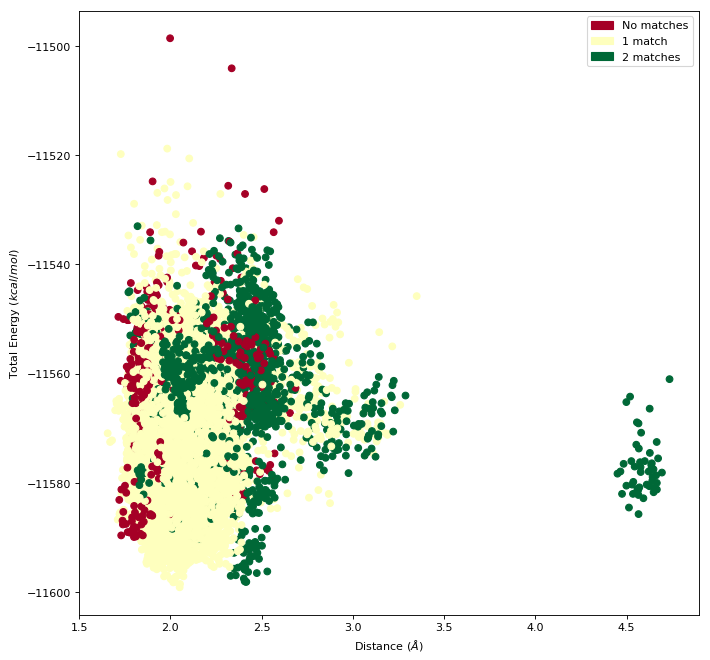

In [57]:
fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylabel('Total Energy (' + r'$kcal/mol$' + ')')
plt.xlabel('Distance (' + r'$\AA$' + ')')
sc = ax.scatter(distances, currentEnergy, c=matchs, cmap=cmap, norm=norm)
ax.legend(handles=patches_list)
plt.savefig(SIMULATION_PATH + 'Plots/BGA_TE_D.png', dpi=80, facecolor='w',
            edgecolor='k', orientation='portrait', transparent=True)
plt.show()

# TODO
- Run galactose with three water molecules
- Count number of 3 matchs per each simulation